In [2]:
# Name:Ashish Sahu
# CodSoft Machine learning
# Credit card fraud detection

#Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Load dataset

In [5]:
train = pd.read_csv("/content/sample_data/fraudTrain.csv")
test = pd.read_csv("/content/sample_data/fraudTrain.csv")

In [6]:
print(train.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [7]:
print(test.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484532 entries, 0 to 484531
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             484532 non-null  int64  
 1   trans_date_trans_time  484532 non-null  object 
 2   cc_num                 484532 non-null  int64  
 3   merchant               484532 non-null  object 
 4   category               484532 non-null  object 
 5   amt                    484532 non-null  float64
 6   first                  484532 non-null  object 
 7   last                   484532 non-null  object 
 8   gender                 484532 non-null  object 
 9   street                 484532 non-null  object 
 10  city                   484532 non-null  object 
 11  state                  484532 non-null  object 
 12  zip                    484531 non-null  float64
 13  lat                    484531 non-null  float64
 14  long                   484531 non-nu

In [9]:
print(train.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  484532.000000  4.845320e+05  484532.000000  484531.000000   
mean   242265.500000  4.163856e+17      70.505358   48755.438350   
std    139872.484653  1.307576e+18     159.738825   26911.808504   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    121132.750000  1.800365e+14       9.650000   26041.000000   
50%    242265.500000  3.519607e+15      47.510000   48154.000000   
75%    363398.250000  4.642255e+15      83.220000   72011.000000   
max    484531.000000  4.992346e+18   25086.940000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  484531.000000  484531.000000  4.845310e+05  4.845310e+05   
mean       38.535691     -90.201914  8.928577e+04  1.335480e+09   
std         5.073957      13.761298  3.034777e+05  5.194883e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.790900  7.430000e+02  1

In [10]:
print(train.shape)

(484532, 23)


#Preprocessing and cleaning

In [11]:
print(train.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


<Axes: >

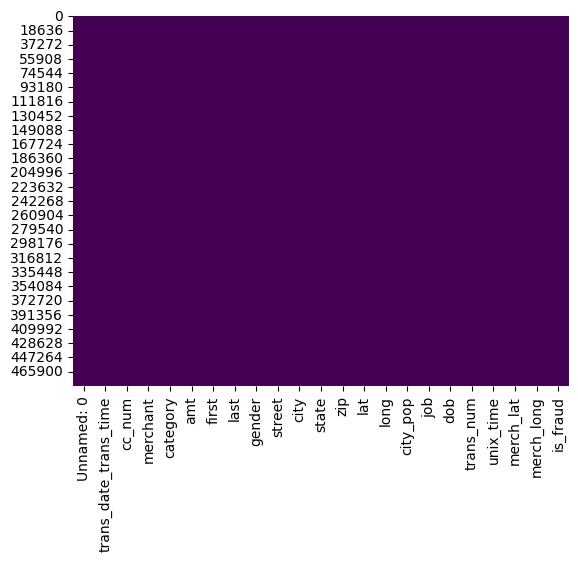

In [12]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')

In [13]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0", 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'trans_date_trans_time'], axis=1, inplace=True)
    clean.dropna(inplace=True)
    return clean


In [14]:
cleaning_data(train)
cleaning_data(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484526,fraud_Huels-Nolan,gas_transport,73.32,M,40.0113,-80.9701,128.0,Child psychotherapist,1.343695e+09,41.005217,-80.139462,0.0
484527,"fraud_Stroman, Hudson and Erdman",gas_transport,49.19,F,42.1939,-76.7361,520.0,Psychotherapist,1.343695e+09,41.390133,-77.322153,0.0
484528,fraud_Zboncak LLC,food_dining,106.66,F,43.8967,-89.8219,3508.0,Sport and exercise psychologist,1.343695e+09,44.833355,-89.974820,0.0
484529,fraud_Paucek-Wiza,grocery_net,54.50,F,40.8626,-91.9534,888.0,Camera operator,1.343695e+09,41.603506,-92.761428,0.0


In [15]:
train['gender'] = train['gender'].map({'M': 0, 'F': 1})
test['gender'] = test['gender'].map({'M': 0, 'F': 1})

In [16]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 484531 entries, 0 to 484530
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    484531 non-null  object 
 1   category    484531 non-null  object 
 2   amt         484531 non-null  float64
 3   gender      484531 non-null  int64  
 4   lat         484531 non-null  float64
 5   long        484531 non-null  float64
 6   city_pop    484531 non-null  float64
 7   job         484531 non-null  object 
 8   unix_time   484531 non-null  float64
 9   merch_lat   484531 non-null  float64
 10  merch_long  484531 non-null  float64
 11  is_fraud    484531 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 48.1+ MB
None


#Function to encode categorical features

In [17]:
encoder = LabelEncoder()
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [18]:
encode(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495.0,361,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,1,48.8878,-118.2105,149.0,417,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,0,42.1808,-112.2620,4154.0,299,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,0,46.2306,-112.1138,1939.0,320,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,0,38.4207,-79.4629,99.0,113,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484526,273,2,73.32,0,40.0113,-80.9701,128.0,78,1.343695e+09,41.005217,-80.139462,0.0
484527,607,2,49.19,1,42.1939,-76.7361,520.0,364,1.343695e+09,41.390133,-77.322153,0.0
484528,685,1,106.66,1,43.8967,-89.8219,3508.0,419,1.343695e+09,44.833355,-89.974820,0.0
484529,478,3,54.50,1,40.8626,-91.9534,888.0,58,1.343695e+09,41.603506,-92.761428,0.0


In [19]:
encode(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495.0,361,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,1,48.8878,-118.2105,149.0,417,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,0,42.1808,-112.2620,4154.0,299,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,0,46.2306,-112.1138,1939.0,320,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,0,38.4207,-79.4629,99.0,113,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484526,273,2,73.32,0,40.0113,-80.9701,128.0,78,1.343695e+09,41.005217,-80.139462,0.0
484527,607,2,49.19,1,42.1939,-76.7361,520.0,364,1.343695e+09,41.390133,-77.322153,0.0
484528,685,1,106.66,1,43.8967,-89.8219,3508.0,419,1.343695e+09,44.833355,-89.974820,0.0
484529,478,3,54.50,1,40.8626,-91.9534,888.0,58,1.343695e+09,41.603506,-92.761428,0.0


In [20]:
fraud_count = train['is_fraud'].value_counts()
print(f"Number of legitimate transactions: {fraud_count[0]}")
print(f"Number of fraudulent transactions: {fraud_count[1]}")

Number of legitimate transactions: 481545
Number of fraudulent transactions: 2986


#Visualisation

Text(0.5, 1.0, 'Ratio of Legitimate to Fraudulent Transactions')

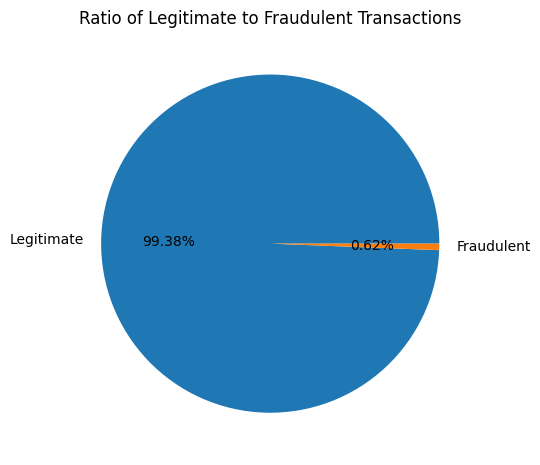

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud_count, labels=["Legitimate", "Fraudulent"], autopct="%0.2f%%", colors=["#1f77b4", "#ff7f0e"])
plt.title("Ratio of Legitimate to Fraudulent Transactions")

is_fraud     0.0   1.0
gender                
0         218214  1403
1         263331  1583


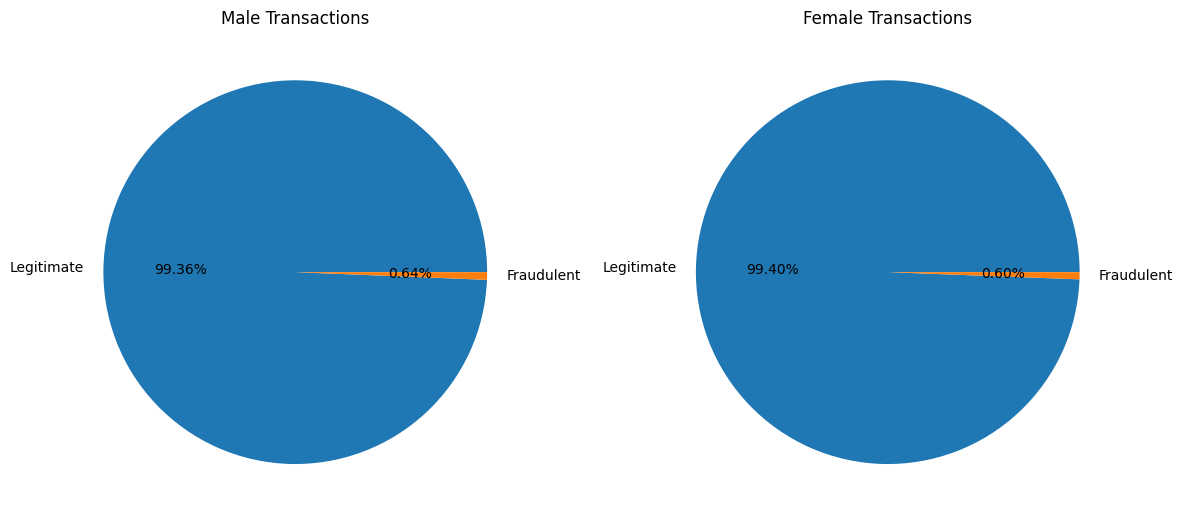

In [22]:
fraud_gender_count = train.groupby(['gender', 'is_fraud']).size().unstack()
print(fraud_gender_count)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

male_counts = fraud_gender_count.loc[0]
female_counts = fraud_gender_count.loc[1]

axes[0].pie(male_counts, labels=["Legitimate", "Fraudulent"], autopct="%0.2f%%", colors=["#1f77b4", "#ff7f0e"])
axes[0].set_title("Male Transactions")

axes[1].pie(female_counts, labels=["Legitimate", "Fraudulent"], autopct="%0.2f%%", colors=["#1f77b4", "#ff7f0e"])
axes[1].set_title("Female Transactions")

plt.tight_layout()
plt.show()

<Axes: >

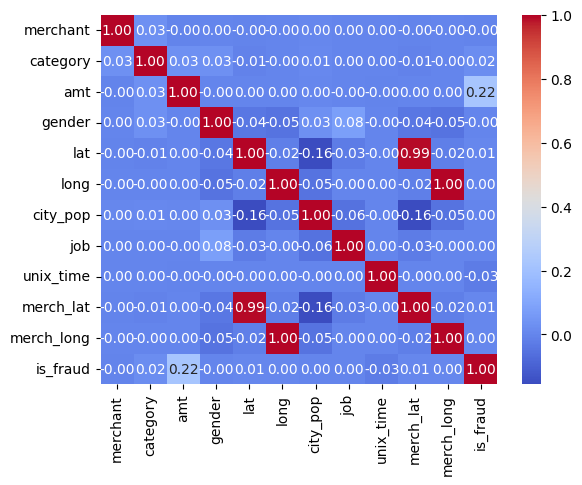

In [23]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")

#Split the data

In [24]:
x = train.drop(columns=["is_fraud"], inplace=False)
y = train["is_fraud"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Comparing decision tree and logistic regression model

In [25]:
model = DecisionTreeClassifier()
model1 = LogisticRegression()

In [26]:
columns = ['LogisticRegression' , 'DecisionTreeClassifier']
accuracies=[]

In [27]:
def evaluate_model(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print(f"Accuracy: {accuracy:.4f}")


In [28]:
evaluate_model(model)

-----Model Evaluation on Test Data-----
DecisionTreeClassifier()

Accuracy: 0.9955


In [29]:
evaluate_model(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()

Accuracy: 0.9938


In [30]:
accuracies

[0.9954698834965482, 0.9938084968062163]

In [31]:
FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

In [32]:
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.995470
1,DecisionTreeClassifier,0.993808


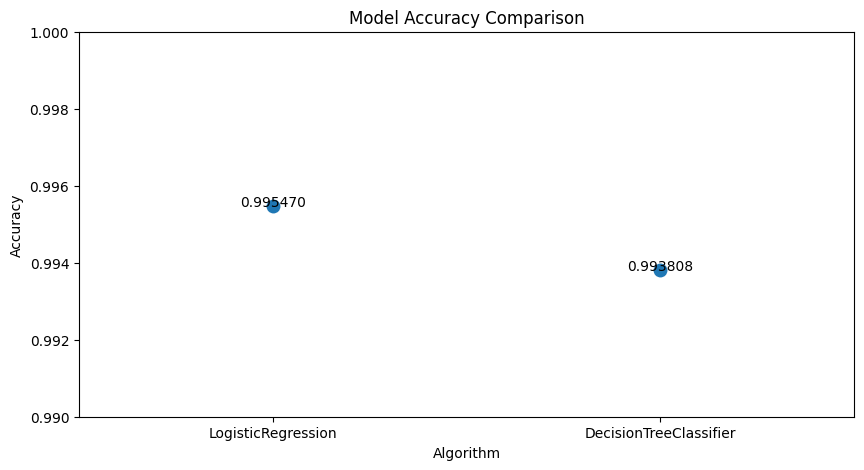

In [33]:
df = FinalResult
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='Algorithm', y='Accuracy', data=df, size=10, jitter=False, ax=ax)
ax.set_ylim([0.99, 1])  # Set the y-axis limit to zoom in on the accuracy values
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

for i, row in df.iterrows():
    ax.text(i, row['Accuracy'], f'{row["Accuracy"]:.6f}', color='black', ha="center")

plt.show()

